# Setup

In [1]:
!pip install dgl

In [2]:
base_path = "../"
src_path = base_path+"src/"
exec(open(src_path+"graph.py").read()) # read loader

Using backend: pytorch


# Get Data

In [3]:
dataset = senseDataset()
#dataset = iamondoDataset()

100%|█| 1595/1595 [02:37<00:00, 10.14it/s, file=SenseThePen+/line_data/p20/l_26.


In [4]:
num_examples = len(dataset)
num_train = int(num_examples * 0.8)
print(num_examples, num_train)

train_sampler = SubsetRandomSampler(torch.arange(num_train))
test_sampler = SubsetRandomSampler(torch.arange(num_train, num_examples))
#print(torch.arange(num_train), torch.arange(num_train, num_examples))

train_dataloader = GraphDataLoader(dataset, sampler=train_sampler, batch_size=5, drop_last=False)
test_dataloader = GraphDataLoader(dataset, sampler=test_sampler, batch_size=5, drop_last=False)

1595 1276


In [5]:
#dim_nfeats = 6
dim_nfeats = 2
gclasses = 3

model = GCN6(dim_nfeats, 64, gclasses)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

GCN6(
  (conv1): GraphConv(in=2, out=64, normalization=both, activation=None)
  (conv2): GraphConv(in=64, out=128, normalization=both, activation=None)
  (conv3): GraphConv(in=128, out=64, normalization=both, activation=None)
  (classify): Linear(in_features=64, out_features=3, bias=True)
)


Train Acc: 97.9624, Train Loss: 0.0641, Test Acc: 98.1191, Test Loss: 0.0528,
[[769  14   2]
 [  8 389   2]
 [  0   0  92]]
[[0.97961783 0.01783439 0.00254777]
 [0.02005013 0.97493734 0.00501253]
 [0.         0.         1.        ]]


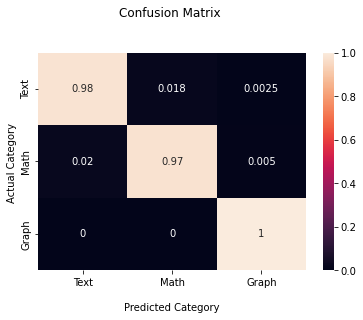

[[213   3   0]
 [  3  77   0]
 [  0   0  23]]
[[0.98611111 0.01388889 0.        ]
 [0.0375     0.9625     0.        ]
 [0.         0.         1.        ]]


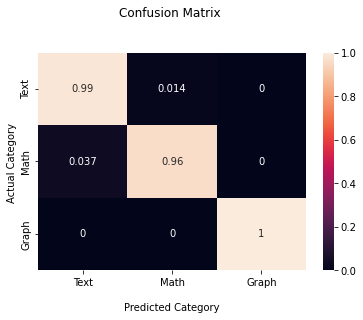

In [6]:
# load model state and test
PATH = "../model/model_sense_gcn5.pth"
#PATH = base_path+"Master TU KL/Master Thesis/online-recognition/model/model5.pth"
model.load_state_dict(torch.load(PATH))
model.eval()

train_acc, train_loss = test(train_dataloader)
test_acc, test_loss = test(test_dataloader)
print(f'Train Acc: {train_acc:.4f}, Train Loss: {train_loss:.4f}, Test Acc: {test_acc:.4f}, Test Loss: {test_loss:.4f},')
visConfusionMatrix(model, train_dataloader)
visConfusionMatrix(model, test_dataloader)

100%|█████████████████████████████████████████| 256/256 [00:04<00:00, 60.33it/s]


Epoch: 000, Test Acc: 74.9216, Test Loss: 0.7822,
[[216   0   0]
 [ 65  15   0]
 [ 11   4   8]]
[[1.         0.         0.        ]
 [0.8125     0.1875     0.        ]
 [0.47826087 0.17391304 0.34782609]]


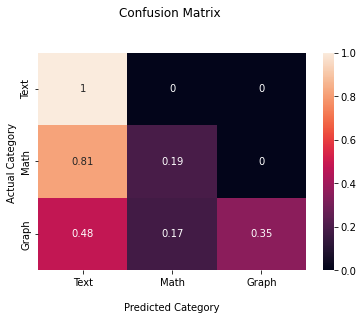

100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 68.32it/s]


Epoch: 001, Test Acc: 78.3699, Test Loss: 0.5852,
[[216   0   0]
 [ 62  13   5]
 [  2   0  21]]
[[1.         0.         0.        ]
 [0.775      0.1625     0.0625    ]
 [0.08695652 0.         0.91304348]]


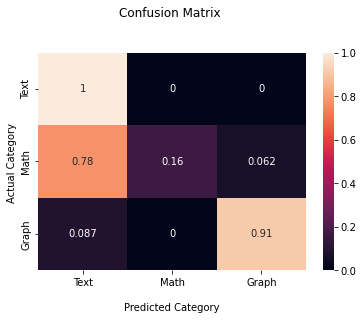

100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 71.05it/s]


Epoch: 002, Test Acc: 93.4169, Test Loss: 0.2006,
[[211   5   0]
 [ 11  69   0]
 [  1   4  18]]
[[0.97685185 0.02314815 0.        ]
 [0.1375     0.8625     0.        ]
 [0.04347826 0.17391304 0.7826087 ]]


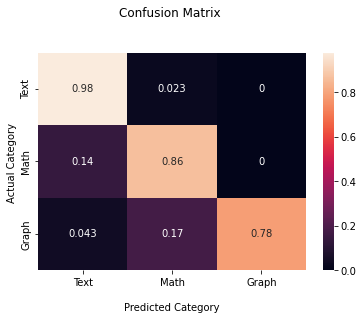

100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 64.32it/s]


Epoch: 003, Test Acc: 92.1630, Test Loss: 0.2318,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 70.07it/s]


Epoch: 004, Test Acc: 96.5517, Test Loss: 0.1468,
[[213   3   0]
 [  7  73   0]
 [  0   1  22]]
[[0.98611111 0.01388889 0.        ]
 [0.0875     0.9125     0.        ]
 [0.         0.04347826 0.95652174]]


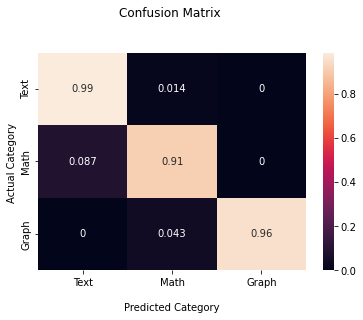

100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 65.42it/s]


Epoch: 005, Test Acc: 94.3574, Test Loss: 0.2037,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 64.09it/s]


Epoch: 006, Test Acc: 94.3574, Test Loss: 0.1642,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 65.67it/s]


Epoch: 007, Test Acc: 85.2665, Test Loss: 0.3314,


100%|█████████████████████████████████████████| 256/256 [00:04<00:00, 62.57it/s]


Epoch: 008, Test Acc: 94.6708, Test Loss: 0.1505,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 66.26it/s]


Epoch: 009, Test Acc: 93.1034, Test Loss: 0.2116,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 68.32it/s]


Epoch: 010, Test Acc: 92.1630, Test Loss: 0.2311,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.38it/s]


Epoch: 011, Test Acc: 88.0878, Test Loss: 0.3064,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 68.71it/s]


Epoch: 012, Test Acc: 94.0439, Test Loss: 0.1580,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.93it/s]


Epoch: 013, Test Acc: 94.6708, Test Loss: 0.1374,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.00it/s]


Epoch: 014, Test Acc: 96.2382, Test Loss: 0.1441,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.07it/s]


Epoch: 015, Test Acc: 94.6708, Test Loss: 0.1383,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 66.20it/s]


Epoch: 016, Test Acc: 95.9248, Test Loss: 0.1362,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.18it/s]


Epoch: 017, Test Acc: 95.6113, Test Loss: 0.1864,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 70.61it/s]


Epoch: 018, Test Acc: 92.7900, Test Loss: 0.2364,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 65.77it/s]


Epoch: 019, Test Acc: 94.9843, Test Loss: 0.1438,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.81it/s]


Epoch: 020, Test Acc: 92.4765, Test Loss: 0.2228,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 68.52it/s]


Epoch: 021, Test Acc: 94.0439, Test Loss: 0.2098,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 65.02it/s]


Epoch: 022, Test Acc: 94.6708, Test Loss: 0.1527,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 64.24it/s]


Epoch: 023, Test Acc: 96.8652, Test Loss: 0.1240,
[[213   3   0]
 [  4  76   0]
 [  0   3  20]]
[[0.98611111 0.01388889 0.        ]
 [0.05       0.95       0.        ]
 [0.         0.13043478 0.86956522]]


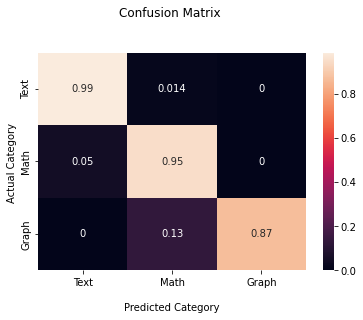

100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 64.46it/s]


Epoch: 024, Test Acc: 94.3574, Test Loss: 0.1533,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 66.74it/s]


Epoch: 025, Test Acc: 94.3574, Test Loss: 0.2818,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 67.57it/s]


Epoch: 026, Test Acc: 92.4765, Test Loss: 0.2428,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.42it/s]


Epoch: 027, Test Acc: 96.8652, Test Loss: 0.1239,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 66.64it/s]


Epoch: 028, Test Acc: 96.5517, Test Loss: 0.1416,


100%|█████████████████████████████████████████| 256/256 [00:04<00:00, 62.21it/s]


Epoch: 029, Test Acc: 96.2382, Test Loss: 0.1217,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 64.36it/s]


Epoch: 030, Test Acc: 95.9248, Test Loss: 0.1657,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 66.83it/s]


Epoch: 031, Test Acc: 93.7304, Test Loss: 0.1892,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 68.45it/s]


Epoch: 032, Test Acc: 94.3574, Test Loss: 0.2178,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 70.56it/s]


Epoch: 033, Test Acc: 96.5517, Test Loss: 0.1151,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 73.07it/s]


Epoch: 034, Test Acc: 96.5517, Test Loss: 0.1126,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 68.44it/s]


Epoch: 035, Test Acc: 96.2382, Test Loss: 0.1195,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 65.34it/s]


Epoch: 036, Test Acc: 96.2382, Test Loss: 0.1513,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 71.15it/s]


Epoch: 037, Test Acc: 94.9843, Test Loss: 0.1994,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.52it/s]


Epoch: 038, Test Acc: 94.9843, Test Loss: 0.1579,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 70.61it/s]


Epoch: 039, Test Acc: 95.9248, Test Loss: 0.1003,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.30it/s]


Epoch: 040, Test Acc: 91.2226, Test Loss: 0.2197,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 73.79it/s]


Epoch: 041, Test Acc: 96.8652, Test Loss: 0.1052,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 71.79it/s]


Epoch: 042, Test Acc: 95.9248, Test Loss: 0.1306,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 68.08it/s]


Epoch: 043, Test Acc: 96.5517, Test Loss: 0.1103,


100%|█████████████████████████████████████████| 256/256 [00:04<00:00, 62.98it/s]


Epoch: 044, Test Acc: 96.8652, Test Loss: 0.0960,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.98it/s]


Epoch: 045, Test Acc: 94.6708, Test Loss: 0.1444,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 71.15it/s]


Epoch: 046, Test Acc: 91.2226, Test Loss: 0.2968,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 67.43it/s]


Epoch: 047, Test Acc: 95.9248, Test Loss: 0.1399,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 67.23it/s]


Epoch: 048, Test Acc: 95.6113, Test Loss: 0.1580,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 66.85it/s]


Epoch: 049, Test Acc: 92.7900, Test Loss: 0.2395,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 68.43it/s]


Epoch: 050, Test Acc: 96.8652, Test Loss: 0.1270,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 66.35it/s]


Epoch: 051, Test Acc: 94.3574, Test Loss: 0.1855,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 65.43it/s]


Epoch: 052, Test Acc: 92.7900, Test Loss: 0.2331,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 65.04it/s]


Epoch: 053, Test Acc: 96.5517, Test Loss: 0.0893,


100%|█████████████████████████████████████████| 256/256 [00:04<00:00, 62.70it/s]


Epoch: 054, Test Acc: 94.9843, Test Loss: 0.1899,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 67.09it/s]


Epoch: 055, Test Acc: 95.2978, Test Loss: 0.1701,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.01it/s]


Epoch: 056, Test Acc: 94.6708, Test Loss: 0.2016,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 72.01it/s]


Epoch: 057, Test Acc: 97.1787, Test Loss: 0.0819,
[[215   1   0]
 [  6  74   0]
 [  0   2  21]]
[[0.99537037 0.00462963 0.        ]
 [0.075      0.925      0.        ]
 [0.         0.08695652 0.91304348]]


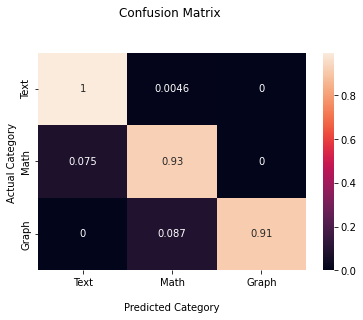

100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 69.87it/s]


Epoch: 058, Test Acc: 97.1787, Test Loss: 0.0845,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 64.24it/s]


Epoch: 059, Test Acc: 95.6113, Test Loss: 0.2569,


100%|█████████████████████████████████████████| 256/256 [00:03<00:00, 66.40it/s]


Epoch: 060, Test Acc: 97.1787, Test Loss: 0.1744,


100%|█████████████████████████████████████████| 256/256 [00:06<00:00, 42.11it/s]


Epoch: 061, Test Acc: 94.9843, Test Loss: 0.2109,


100%|█████████████████████████████████████████| 256/256 [00:05<00:00, 47.02it/s]


Epoch: 062, Test Acc: 93.7304, Test Loss: 0.2977,


100%|█████████████████████████████████████████| 256/256 [00:05<00:00, 47.03it/s]


Epoch: 063, Test Acc: 96.2382, Test Loss: 0.1229,


100%|█████████████████████████████████████████| 256/256 [00:07<00:00, 34.90it/s]


Epoch: 064, Test Acc: 96.8652, Test Loss: 0.0931,


100%|█████████████████████████████████████████| 256/256 [00:07<00:00, 35.49it/s]


Epoch: 065, Test Acc: 95.9248, Test Loss: 0.1234,


100%|█████████████████████████████████████████| 256/256 [00:07<00:00, 34.08it/s]


Epoch: 066, Test Acc: 96.5517, Test Loss: 0.1445,


100%|█████████████████████████████████████████| 256/256 [00:08<00:00, 31.37it/s]


Epoch: 067, Test Acc: 97.4922, Test Loss: 0.1001,


100%|█████████████████████████████████████████| 256/256 [00:07<00:00, 36.24it/s]


Epoch: 068, Test Acc: 95.6113, Test Loss: 0.1876,


100%|█████████████████████████████████████████| 256/256 [00:07<00:00, 32.64it/s]


Epoch: 069, Test Acc: 93.1034, Test Loss: 0.2494,


100%|█████████████████████████████████████████| 256/256 [00:11<00:00, 21.43it/s]


Epoch: 070, Test Acc: 96.8652, Test Loss: 0.1756,


100%|█████████████████████████████████████████| 256/256 [00:08<00:00, 30.87it/s]


Epoch: 071, Test Acc: 96.2382, Test Loss: 0.1155,


100%|█████████████████████████████████████████| 256/256 [00:08<00:00, 30.48it/s]


Epoch: 072, Test Acc: 95.9248, Test Loss: 0.0900,


100%|█████████████████████████████████████████| 256/256 [00:10<00:00, 23.53it/s]


Epoch: 073, Test Acc: 95.2978, Test Loss: 0.1986,


100%|█████████████████████████████████████████| 256/256 [00:07<00:00, 33.18it/s]


Epoch: 074, Test Acc: 96.8652, Test Loss: 0.1371,


100%|█████████████████████████████████████████| 256/256 [00:12<00:00, 19.99it/s]


Epoch: 075, Test Acc: 97.1787, Test Loss: 0.1379,


100%|█████████████████████████████████████████| 256/256 [00:08<00:00, 30.59it/s]


Epoch: 076, Test Acc: 96.5517, Test Loss: 0.1397,


100%|█████████████████████████████████████████| 256/256 [00:06<00:00, 36.86it/s]


Epoch: 077, Test Acc: 95.2978, Test Loss: 0.1169,


100%|█████████████████████████████████████████| 256/256 [00:11<00:00, 22.89it/s]


Epoch: 078, Test Acc: 96.5517, Test Loss: 0.1605,


100%|█████████████████████████████████████████| 256/256 [00:10<00:00, 25.32it/s]


Epoch: 079, Test Acc: 95.6113, Test Loss: 0.1506,


100%|█████████████████████████████████████████| 256/256 [00:09<00:00, 26.18it/s]


Epoch: 080, Test Acc: 96.5517, Test Loss: 0.0962,


100%|█████████████████████████████████████████| 256/256 [00:11<00:00, 22.35it/s]


Epoch: 081, Test Acc: 96.5517, Test Loss: 0.1181,


100%|█████████████████████████████████████████| 256/256 [00:06<00:00, 41.46it/s]


Epoch: 082, Test Acc: 96.5517, Test Loss: 0.1106,


100%|█████████████████████████████████████████| 256/256 [00:06<00:00, 42.47it/s]


Epoch: 083, Test Acc: 96.8652, Test Loss: 0.0743,


100%|█████████████████████████████████████████| 256/256 [00:05<00:00, 45.88it/s]


Epoch: 084, Test Acc: 96.8652, Test Loss: 0.1417,


100%|█████████████████████████████████████████| 256/256 [00:08<00:00, 31.97it/s]


Epoch: 085, Test Acc: 98.1191, Test Loss: 0.0529,
[[213   3   0]
 [  3  77   0]
 [  0   0  23]]
[[0.98611111 0.01388889 0.        ]
 [0.0375     0.9625     0.        ]
 [0.         0.         1.        ]]


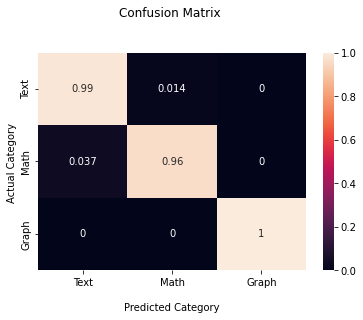

100%|█████████████████████████████████████████| 256/256 [00:05<00:00, 45.08it/s]


Epoch: 086, Test Acc: 96.8652, Test Loss: 0.2012,


100%|█████████████████████████████████████████| 256/256 [03:01<00:00,  1.41it/s]


Epoch: 087, Test Acc: 94.9843, Test Loss: 0.1734,


100%|█████████████████████████████████████████| 256/256 [04:13<00:00,  1.01it/s]


Epoch: 088, Test Acc: 96.8652, Test Loss: 0.1129,


100%|█████████████████████████████████████████| 256/256 [04:15<00:00,  1.00it/s]


Epoch: 089, Test Acc: 97.1787, Test Loss: 0.1578,


100%|█████████████████████████████████████████| 256/256 [04:17<00:00,  1.01s/it]


Epoch: 090, Test Acc: 95.2978, Test Loss: 0.1433,


100%|█████████████████████████████████████████| 256/256 [04:23<00:00,  1.03s/it]


Epoch: 091, Test Acc: 96.8652, Test Loss: 0.1536,


100%|█████████████████████████████████████████| 256/256 [04:28<00:00,  1.05s/it]


Epoch: 092, Test Acc: 96.2382, Test Loss: 0.1317,


100%|█████████████████████████████████████████| 256/256 [04:43<00:00,  1.11s/it]


Epoch: 093, Test Acc: 94.9843, Test Loss: 0.2234,


100%|█████████████████████████████████████████| 256/256 [05:21<00:00,  1.26s/it]


Epoch: 094, Test Acc: 95.2978, Test Loss: 0.1931,


100%|█████████████████████████████████████████| 256/256 [06:01<00:00,  1.41s/it]


Epoch: 095, Test Acc: 96.2382, Test Loss: 0.1177,


100%|█████████████████████████████████████████| 256/256 [05:46<00:00,  1.35s/it]


Epoch: 096, Test Acc: 97.1787, Test Loss: 0.1067,


 62%|█████████████████████████▍               | 159/256 [03:54<02:22,  1.47s/it]

In [ ]:
best_test_acc = 0
best_test_loss = 1000
for epoch in range(200):
    train()
    #train_acc, train_loss = test(train_dataloader)
    test_acc, test_loss = test(test_dataloader)

    #print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Train Loss: {train_loss:.4f}, Test Acc: {test_acc:.4f}, Test Loss: {test_loss:.4f},')
    print(f'Epoch: {epoch:03d}, Test Acc: {test_acc:.4f}, Test Loss: {test_loss:.4f},')

    if( best_test_acc < test_acc and best_test_loss > float(test_loss) ):
      # show when increase
      best_test_acc = test_acc
      best_test_loss = test_loss
      # save
      PATH = "../model/model_sense_gcn52.pth"
      #PATH = base_path+"Master TU KL/Master Thesis/online-recognition/model/modelxx.pth"
      torch.save(model.state_dict(), PATH)
      # vis
      visConfusionMatrix(model, test_dataloader)